In [45]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize= (12,9))

# Abstract
In this lab we found the spectra of the sun using CCD data from the telescope. We took images of the sky and read in the light from the sun reflected of it. We were able to calibrate the wavelength of our data for the sun by figuring out a callibration for the neon light and matching it to the neon emission lines

# Introduction
Spectroscopy gives you the light distribution of a star. We are dealing with visible wavelengths and the sun and since the sun is a black body it should show up at all visible waelengths. When there are missing parts or lines, those are absorption lines and it means that a gas is between the telescope and the source and is absorbing photons.The other parts of a spectrum, the parts that actually show up, are the emission lines, photons from source that conect with the telescope. 

With spectroscopy there are two ways to get the spectrum of a light source. You collect the light through a slit, collomze it and use a disperser. There are wo types of dispersers that we went over. The first is a prisim. The light goes through one side of the prisim and comes out at an angle, the light is dispersed into a spectrum. The second is a grating. The light goes through a grating and is reflected off of a grove and dispersed into orders, this gives you multiple spectra.

There are different types of spectographs. The Interference filter allows someone to get a spectrum over a wide feild but only at a few wavelengths, someone would have to do it multiple times to get a full spectrum that we're use to. The Integral Field Unit allows you to get a spectrum with more wavelengths over a small fild of view. Multi-object Spectroscopy allows you to obtain spectra from many stars at once by haveing fibers bring light into the slit, but this only works for stars and no on pictures of the black sky.

# Theory
In this lab we looked at spectrosopy using the telescope which used a grating to dispurse the light and the CCD to get the data. The grating itself has these groves that the photons hit and are reflected off of and it does this for multiple order. The grating equation is 
$$\Delta s = d\sin{\alpha} +d\sin{\beta} = m\lambda$$
The distance between the grooves multiplied by the sum of the angle of incident and the angle of reflection equals he difractive order times the wavelength.

This grating is used as a disperser in the telescope, the light comes in through a slit and then through a collimator to make the light go in a straight line into the disperser, which is a graiting but can also be a prisim, then goes to the camera, lastly the different order spectra are displayed on the focal plane.

Once we have the data read in we create a Flux vs. wavelength plot and we calibrate it into angstroms. We were given that each pixel is 4.3Å and that the data was set to around 6000, so with this information I was able to calibrate it by multiplying by 4.3 and adding 6000, but the 6000 wa

# Experiment and Methodology

Below is the averages of the bias, dark frames, and the neon background. Also the averages for the neon images and the images of the sky. When putting in the data I subtracted the neon background from the neon images and the dark and bias from the sky images

In [46]:
bias = []
for i in range(1,11):
    bias.append(fits.getdata("baisBias0000000{}.fit".format(i) , ext=0).astype(np.int))

In [47]:
avbias=sum(bias)/10
avbias.mean()
print (avbias)

[[ 1062.5  1061.7  1060.7 ...,  1030.5  1031.4  1029.5]
 [ 1064.1  1059.4  1062.3 ...,  1028.9  1034.1  1032. ]
 [ 1066.1  1061.   1064.6 ...,  1032.8  1035.8  1036.9]
 ..., 
 [ 1056.1  1059.9  1062.6 ...,  1027.9  1034.   1028.7]
 [ 1054.2  1056.1  1061.2 ...,  1028.8  1031.3  1029.7]
 [ 1055.   1058.3  1056.9 ...,  1029.3  1030.8  1029.9]]


In [48]:
dark = []
for i in range(1,4):
    dark.append(fits.getdata("darkDark0000000{}.fit".format(i) , ext=0).astype(np.int))

In [49]:
avdark=sum(dark)/3
avdark.mean()
print (avdark)

[[ 1059.66666667  1058.          1063.33333333 ...,  1037.33333333
   1034.66666667  1026.33333333]
 [ 1064.          1056.33333333  1052.66666667 ...,  1025.          1033.
   1032.66666667]
 [ 1057.33333333  1062.33333333  1055.         ...,  1027.66666667
   1032.33333333  1038.66666667]
 ..., 
 [ 1055.          1058.66666667  1057.         ...,  1031.66666667
   1028.33333333  1036.66666667]
 [ 1058.          1060.66666667  1067.33333333 ...,  1032.66666667
   1028.33333333  1020.        ]
 [ 1059.66666667  1055.66666667  1056.33333333 ...,  1021.33333333
   1031.66666667  1032.33333333]]


In [50]:
neonbackground = []
for i in range(1,6):
    neonbackground.append(fits.getdata("neon backgroundSGSNoTarget0000000{}.fit".format(i) , ext=0).astype(np.int))

In [51]:
avneonbackground=sum(neonbackground)/5
avneonbackground.mean()

1065.9515873382034

In [52]:
neon = []
for i in range(1,4):
    neon.append(fits.getdata("neonSGSNoTarget000000{}.fit".format(i) , ext=0).astype(np.int))

In [53]:
avneon=sum(neon)/3
print (avneon)

[[ 1091.66666667  1107.33333333  1142.         ...,  1045.          1035.
   1036.66666667]
 [ 1098.33333333  1121.66666667  1153.66666667 ...,  1035.33333333  1035.
   1042.        ]
 [ 1103.33333333  1114.          1183.33333333 ...,  1032.66666667
   1041.33333333  1037.66666667]
 ..., 
 [ 1070.33333333  1074.          1070.33333333 ...,  1088.66666667  1104.
   1092.66666667]
 [ 1071.          1064.          1073.33333333 ...,  1102.33333333
   1094.66666667  1107.33333333]
 [ 1068.33333333  1078.66666667  1067.         ...,  1105.66666667
   1104.66666667  1098.        ]]


In [54]:
sky = []
for i in range(1,6):
    sky.append(fits.getdata("skySGSNoTarget00000001.fit".format(i) , ext=0).astype(np.int))

In [55]:
avsky = sum(sky)/5

Below is the background subtraction of the neon images.

In [56]:
realneon = avneon-avneonbackground
print (realneon)

[[  26.66666667   42.93333333   77.2        ...,   11.4           0.4
     4.66666667]
 [  36.13333333   57.86666667   89.46666667 ...,    2.33333333    2.2
     4.2       ]
 [  34.73333333   48.6         120.33333333 ...,    0.86666667
     2.33333333    2.46666667]
 ..., 
 [   4.73333333   12.8           4.73333333 ...,    7.26666667   18.2
    13.86666667]
 [   0.6          -6.           -0.86666667 ...,   20.33333333
     5.26666667   24.53333333]
 [  -1.86666667    2.46666667   -2.         ...,   19.46666667
    28.26666667   20.8       ]]


Below is the neon lines read in from a text file and turned into an array.

In [57]:
with open('neon_jdm.txt') as f:
    lines = f.readlines()
    a = [line.split()[0] for line in lines]
    
x = np.array(list(a),dtype=float)
print (x)

[  3397.866    3417.9035   3472.5711   3515.19     3593.5263   3600.1691
   4488.0926   4636.125    4837.3139   5005.1587   5031.3504   5104.7011
   5113.6724   5144.9384   5188.6122   5330.7775   5341.0938   5360.0121
   5400.5617   5562.7662   5656.5664   5689.8163   5719.2248   5748.2985
   5764.4188   5804.4496   5820.1558   5852.4878   5881.895    5944.8342
   5975.534    6029.9971   6074.3377   6096.1631   6128.4499   6143.0626
   6163.5939   6217.2812   6266.495    6304.789    6334.4278   6382.9917
   6402.246    6506.5281   6532.8822   6598.9529   6678.2764   6717.043
   6929.4673   7024.0504   7032.4131   7173.9381   7245.1666   7438.899
   7488.8712   7535.7739   8136.4057   8300.3263   8377.6065   8495.3598
   8591.2583   8634.647    8654.3831   8655.522    8679.493    8681.921
   8704.111    8771.656    8780.621    8783.75     8830.907    8853.867
   8919.5007   9148.672    9201.759    9300.853    9326.507    9425.379
   9486.68     9534.163    9665.424   10798.12    10844.

Below is the image of the neon light and the reversed image, below it is the spectr data we got in blue and the neon lines plotted over it. The flux of the data might not be as intense as the source for neon emission lines because it was taken off of a neon light, and not as intense, but the location are the same.

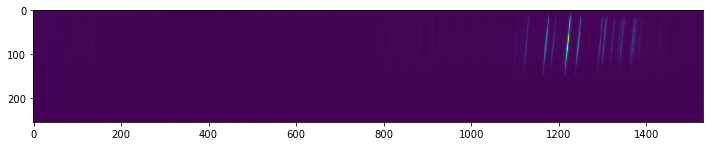

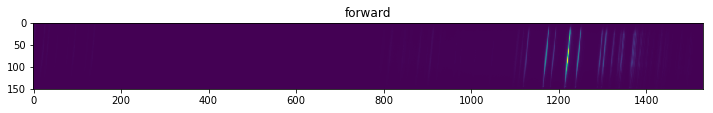

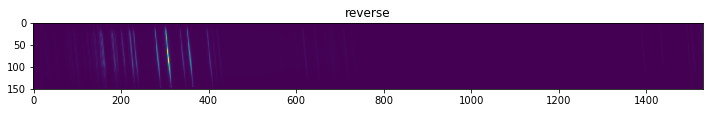

[  12.46666667    5.6           5.13333333 ...,  525.73333333  240.73333333
  134.73333333]
[  134.73333333   133.06666667   103.13333333 ...,  8893.26666667  4471.6
  2314.6       ]


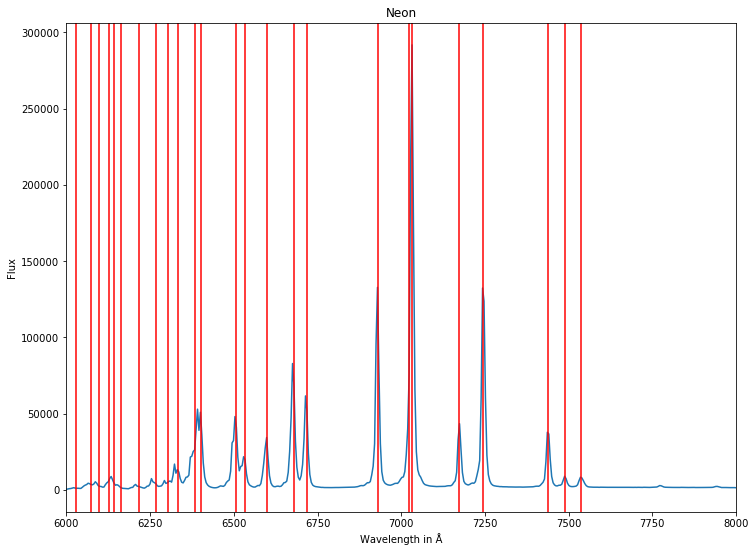

57.1333333333


In [58]:

plt.imshow(realneon)
plt.show()
realneon.shape
mysubimage = realneon[:150, :]
myreversesubimage = mysubimage[:,::-1]
# or, identically: myreversesubimage = myimage[150:201,::-1]

plt.imshow(mysubimage)
plt.title("forward")
plt.show()

plt.imshow(myreversesubimage)
plt.title("reverse")
plt.show()
myvector = myreversesubimage[25, :]
print(myvector)
myvec25 = myreversesubimage[25, :]
myvec26 = myreversesubimage[26, :]
myvec27 = myreversesubimage[27, :]
myvec28 = myreversesubimage[28, :]
myvec29 = myreversesubimage[29, :]
myvec30 = myreversesubimage[30, :]
myvec31 = myreversesubimage[31, :]
myvec32 = myreversesubimage[32, :]
myvec33 = myreversesubimage[33, :]
myvec34 = myreversesubimage[34, :]
myvec35 = myreversesubimage[35, :]
myvec36 = myreversesubimage[36, :]
myaddedvec = myvec25 + myvec26 + myvec27 + myvec28 + myvec29 + myvec30 + myvec31 + myvec32 + myvec33 + myvec34 + myvec35 + myvec36
print(myaddedvec)
numberofcols = len(myaddedvec)
colnum = np.arange(numberofcols)

vertcols = x # Note, I just picked these for demo purposes

# You can plot things logarithmically in a couple of ways:
plt.plot(4.3*colnum+ 5725, (myaddedvec+58))
plt.title("Neon")
plt.xlim(6000,8000)
plt.xlabel('Wavelength in Å')
plt.ylabel('Flux')
for col in vertcols:
    # So `col` is 100 the first time in the loop, 300 the second time, 800 the third time, etc.
    plt.axvline(col, color = 'r')
plt.show()
print (min(myaddedvec))

We calibrated the spectrum by multiplying by 4.3 which was the Angstroms per pixel and adding 5725 because it seemed to match up, when we tried to use the 6000 that we originally were told it didn't match up quite right.

This is between the 600 and 800 nm wavelenth

Beelow is the sky with the dark and bias frames subtracted

In [59]:
realsky = avsky-avdark-avbias
print (realsky)

[[ -682.16666667  -694.7         -704.03333333 ...,  4744.16666667
   4701.93333333  4672.16666667]
 [ -670.1         -636.73333333  -667.96666667 ...,  4931.1         4866.9
   4804.33333333]
 [ -672.43333333  -670.33333333  -677.6        ...,  4918.53333333
   4984.86666667  4842.43333333]
 ..., 
 [ -900.1         -904.56666667  -932.6        ...,  -361.56666667
   -387.33333333  -385.36666667]
 [ -886.2         -898.76666667  -892.53333333 ...,  -409.46666667
   -385.63333333  -356.7       ]
 [ -895.66666667  -883.96666667  -892.23333333 ...,  -369.63333333
   -406.46666667  -372.23333333]]


Below is the array I created for the important absorption lines in the sun's spectrum. They are $Ca$, $Ca$, $Fe$ & $Ca$, $H\gamma$, $H\beta$, $Mg$, $He$, $Na$, $O_{2}$, $H\alpha$, $O_{2}$, $H_{2}O$, and $O_{2}$, in that order

In [60]:
j = [3933, 3968, 4307, 4340, 4861, 5168, 5875, 5887, 6276, 6562, 6867, 7250, 7593]

Below is the sky's flux vs. wavelength in Angstrom plot with these elements plotted over it. I used the calibration from the neon with the sky.

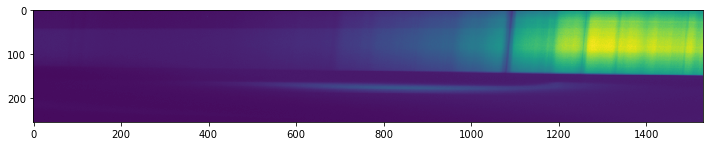

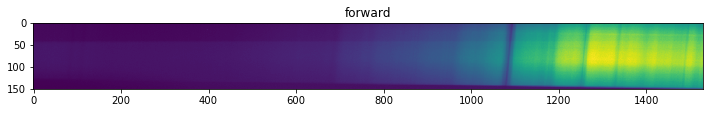

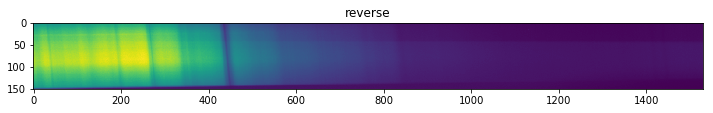

[ 6910.03333333  7065.2         7036.56666667 ...,  -602.23333333
  -615.23333333  -630.4       ]
[ 87633.43333333  88022.83333333  87675.23333333 ...,  -7142.9         -7269.1
  -7219.9       ]


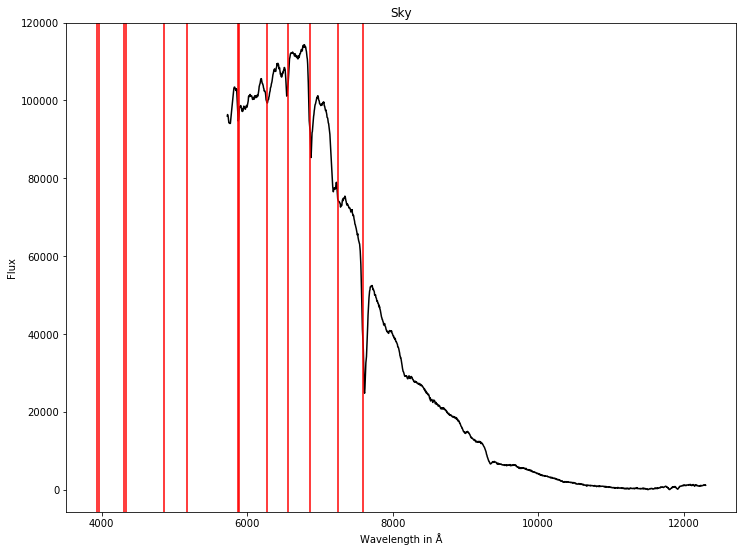

-8356.7


In [61]:

plt.imshow(realsky)
plt.show()
realsky.shape
mysubimage = realsky[:150, :]
myreversesubimage = mysubimage[:,::-1]
# or, identically: myreversesubimage = myimage[150:201,::-1]

plt.imshow(mysubimage)
plt.title("forward")
plt.show()

plt.imshow(myreversesubimage)
plt.title("reverse")
plt.show()
myvector = myreversesubimage[25, :]
print(myvector)
myvec25 = myreversesubimage[25, :]
myvec26 = myreversesubimage[26, :]
myvec27 = myreversesubimage[27, :]
myvec28 = myreversesubimage[28, :]
myvec29 = myreversesubimage[29, :]
myvec30 = myreversesubimage[30, :]
myvec31 = myreversesubimage[31, :]
myvec32 = myreversesubimage[32, :]
myvec33 = myreversesubimage[33, :]
myvec34 = myreversesubimage[34, :]
myvec35 = myreversesubimage[35, :]
myvec36 = myreversesubimage[36, :]
myaddedvec = myvec25 + myvec26 + myvec27 + myvec28 + myvec29 + myvec30 + myvec31 + myvec32 + myvec33 + myvec34 + myvec35 + myvec36
print(myaddedvec)
numberofcols = len(myaddedvec)
colnum = np.arange(numberofcols)

vertcols = j # Note, I just picked these for demo purposes

# You can plot things logarithmically in a couple of ways:
# or
plt.plot(4.3*colnum+ 5725, myaddedvec+8357, color='k')
plt.title("Sky")
#plt.xlim(5500,8000)
plt.xlabel('Wavelength in Å')
plt.ylabel('Flux')
#plt.yscale('log')
for col in vertcols:
    plt.axvline(col, color='r')
plt.show()
print (min(myaddedvec))



You get absorption lines when a souse of light that you are taking a spectrum of is blocked by some cool gas. The elements in this gas absorb specific photons sent by the source and cause a dip/gap in the specturum of the source.

Absorbtion lines in the solar spectrum are distiguishable by the strong dips in the spectrum. Some lines might be broarder than others because of the atmosphere. We didn't take a spectrum of the sun but of the sky that was reflecting the suns light, because of that we get absorption lines from elements in the atmosphere. 

$O_{2}$, $H_{2}O$, and $H\alpha$ absorption lines are easily distinguishable and they are between 600 and 700 nm

The spectum of the sky is similar to but doen't match the spectrum of the sun, mainly because of the atmospheric interferences and also because it is a spectrum of the reflection of the sun. We can tell what star's spectra will look like through our atmosphere with this.

# Summary
In this lab I got data from the CCD telescope from aneon light and the sky, also I got background frames for the neon and dark and bias frames for the sky. I averaged all of this and subtracted the neon background from the neon frames and the bias and dark from the sky frames. I took 10 rows of the data and added them to crate an intensity vs. wavelength plot for the neon light and the sky. I calibrated the neon light by overploting the emmision lines of neon and streating and moving the neon data lines to match. Once I have that calibrated I used it on the plot for the sky and overplotted important lines from the sun spectrum over it.

# Conclusion
I was able to extract light data and calibrate and convert it into wavelengths in order to examine its information better. With this data calibrated I can tell what elements are in the light source, orthe elements that are in between the lght source and the telescope. With this we can see how stars like the sun look through our atmosphere and are able to identify different elements in our atmoshpere.